#### Eleonora Bellasio (15650A)
# <span style="color:orangered">Laboratorio di Simulazione Numerica: Esercitazione 7

### <span style="color:royalblue">Esercizio 07.1

Si sono incluse nel codice NSL_SIMULATOR le "tail corrections" per l'energia potenziale $U$ e per la pressione $P$, ovvero si è tenuto conto del valore dell'integrale anche tra $r_{cut}$ e $\infty$. I contributi all'energia e alla pressione per $r>r_{cut}$ sono spesso stimati assumento che $g(r) \sim 1$ in questa regione:
$$\langle V \rangle_{tail} = 2\pi \rho N \int_{r_c}^{+\infty} r^2 v(r)g(r) \,dr \cong 2\pi \rho N \int_{r_c}^{+\infty} r^2 v(r) \,dr $$
Nel caso specifico del potenziale di Lennard-Jones si ha:
$$ \frac{\langle V_{LJ} \rangle_{tail}}{N} \cong \frac{8 \pi \rho_{LJ} \epsilon}{9 r_{c(LJ)}^9}-\frac{8 \pi \rho_{LJ} \epsilon}{3 r_{c(LJ)}^3}$$
Per la pressione, invece si ottiene:
$$ \frac{\langle w_{LJ} \rangle_{tail}}{3N \epsilon} \cong 32 \pi \rho_{LJ} \left[ \frac{1}{9 r_{c(LJ)}^9} - \frac{1}{6 r_{c(LJ)^3}} \right] $$

### <span style="color:royalblue">Esercizio 07.2

L'obiettivo di questo esercizio è quello di cercare il numero di "time steps" per la simulazione di Dinamica Molecolare(N, V, E) e di passi per la simulazione Monte Carlo(N, V, T) in cui dividere la simulazione per ottenere dei risultati migliori.
I parametri utilizzati sono:

- $\rho = 0.8 $
- $T = 1.1 $
- $r_{cut} = 2.5 $
- $dt = 0.001$ per MD
- $\delta = 0.1$ per MC (si verifica che a questo valore corrisponde un'accettanza del 50%)

Prima della simulazione effettiva si è effettuata una simulazione di equilibrazione con $50 000$ blocchi da un solo passo, partendo da una configurazione di cristallo $fcc$. In una simulazione di DM la temperatura cambia fino al raggiungimento dell'equilibrio, quindi, per poter effettuare la simulazione equilibrata con $T=1.1$, è necessario avere una temperatura iniziale (stabilita per tentativi pari a $T=2$) maggiore bella fase di equilibrazione. E' importante, infatti, eseguire entrabe le simulazioni alla stessa temperatura per poterle confrontare. 

Per prima cosa mostro che la temperatura durante la fase di equilibrazione della DM assume un andamento asintotico verso $T^{\star}$.

Temperatura della simulazione MD alla fine della fase di equilibrazione:  1.1110673766666668


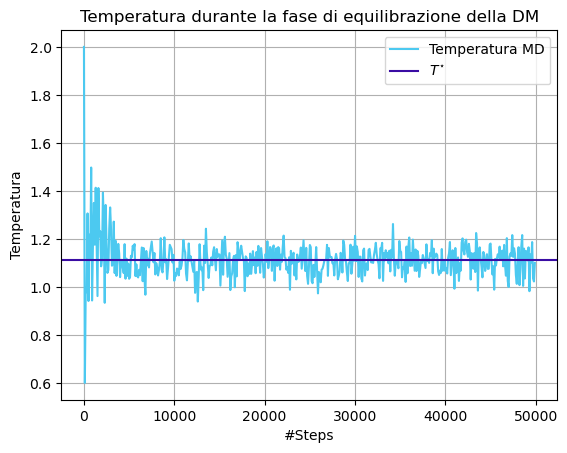

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import os,sys
import pandas as pd
from scipy.optimize import curve_fit

dinp_MD = "07.2/OUTPUT_FINALI/OUTPUT_MD/"
dinp_MC = "07.2/OUTPUT_FINALI/OUTPUT_MC/"
dinp_eq_MD = "07.2/OUTPUT_FINALI/OUTPUT_eq_MD/"
dinp_eq_MC = "07.2/OUTPUT_FINALI/OUTPUT_eq_MC/"
finp_eq_MD = dinp_eq_MD + "temperature.dat" #Temeratura della fase di equilibrazione di DM
    
if not os.path.isfile(finp_eq_MD):
    sys.exit( "file does not exist: " + finp_eq_MD )

#Definisco una funzione costante per fare un fit della temperatura di equilibrio
def f(x, c):
    return c

#Parametri
T_star = 1.1
M = 50000 #Blocchi della simulazione di equilibrazione
M_filtro = 20000 #Blocchi da scartare per il fit
#Controllo che la temperatura tenda ad 1.1 durante la fase di equilibrazione di MD
df_temp_eq_MD = pd.read_csv(finp_eq_MD, sep='\\s+', comment='#', names=['BLOCK:','ACTUAL_T:','AVE_T:','ERROR:'])
df_temp_fit = df_temp_eq_MD[df_temp_eq_MD['BLOCK:'] >= M_filtro]

p_opt, p_cov = curve_fit(f, df_temp_eq_MD['BLOCK:'], df_temp_fit['ACTUAL_T:'])
print ('Temperatura della simulazione MD alla fine della fase di equilibrazione: ', p_opt[0])

plt.plot(df_temp_eq_MD['BLOCK:'], df_temp_eq_MD['ACTUAL_T:'], label='Temperatura MD', color = '#4cc9f0')
plt.axhline(y=p_opt[0], label=r'$T^{\star}$', color = '#3a0ca3' )
plt.title('Temperatura durante la fase di equilibrazione della DM')
plt.xlabel('#Steps')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.show()

Dal grafico è possibile osservare che la temperatura scelta all'inizio della fase di equilibrazione porta il sistema a $T=1.1$ come richeiesto.

A questo putno è necessario verificare che con il valore scelto per lo step MC, ovvero $\delta = 0.103$, si abbia un'accettanza pari al $50 \%$.

Accettanza della simulazione MC:  0.4982510530648978


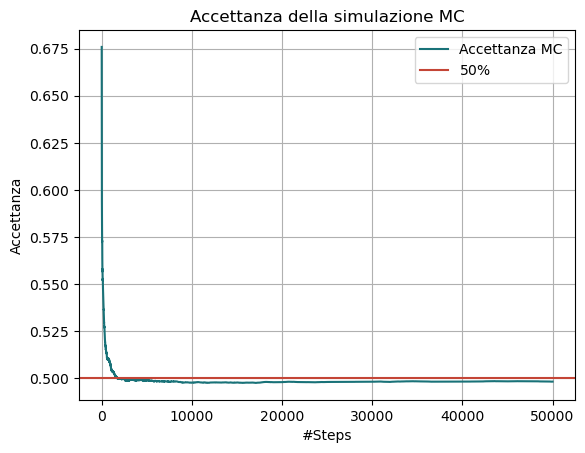

In [3]:
finp_acc_MC = dinp_eq_MC + "acceptance.dat" #accettanza per sim MC

if not os.path.isfile(finp_acc_MC):
    sys.exit( "file does not exist: " + finp_acc_MC )

df_acc_MC = pd.read_csv(finp_acc_MC, sep='\\s+', comment='#', names=['BLOCK:','ACCEPTANCE:'])
df_acc_fit = df_acc_MC[df_acc_MC['BLOCK:'] >= M_filtro]

p_opt, p_cov = curve_fit(f, df_acc_MC['BLOCK:'], df_acc_fit['ACCEPTANCE:'])
print ('Accettanza della simulazione MC: ', p_opt[0])

plt.plot(df_acc_MC['BLOCK:'], df_acc_MC['ACCEPTANCE:'], label='Accettanza MC', color = '#197278')
plt.axhline(y=0.50, label=r'$50 \%$', color = '#c44536' )
plt.title('Accettanza della simulazione MC')
plt.xlabel('#Steps')
plt.ylabel('Accettanza')
plt.legend()
plt.grid(True)
plt.show()

Partendo dalla configurazione trovata durante la fase di equilibrazione e ponendo restart=1, si è effettuata la simulazione principale con $M=10^5$ passi. Di seguito si produce un grafico che rappresenta i valori istantanei dell'energia potenziale per particella $U/N$ durante le simulazioni di DM e MC.

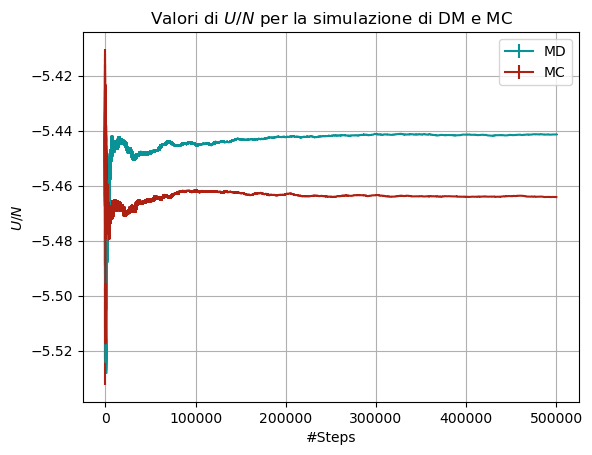

In [7]:
#Energia Potenziale
finp_pe_MD = dinp_MD + "potential_energy_MD.dat" #energia potenziale all'equilibrio per sim MD
finp_pe_MC = dinp_MC + "potential_energy_MC.dat" #energia potenziale all'equilibrio per sim MC
if not os.path.isfile(finp_pe_MD):
    sys.exit( "file does not exist: " + finp_pe_MD )
if not os.path.isfile(finp_pe_MC):
    sys.exit( "file does not exist: " + finp_pe_MC )

df_pe_MD = pd.read_csv(finp_pe_MD, sep='\\s+', comment='#', names=['BLOCK:','ACTUAL_PE:','AVE_PE:','ERROR:'])
df_pe_MC = pd.read_csv(finp_pe_MC, sep='\\s+', comment='#', names=['BLOCK:','ACTUAL_PE:','AVE_PE:','ERROR:'])

plt.errorbar(df_pe_MD['BLOCK:'], df_pe_MD['AVE_PE:'], yerr= df_pe_MD['ERROR:'], label = 'MD', color = '#0a9396')
plt.errorbar(df_pe_MC['BLOCK:'], df_pe_MC['AVE_PE:'], yerr= df_pe_MC['ERROR:'], label = 'MC', color = '#ae2012')
plt.title(r'Valori di $U/N$ per la simulazione di DM e MC')
plt.xlabel('#Steps')
plt.ylabel(r'$U/N$')
plt.legend()
plt.grid(True)
plt.show()

Dopo avere ottenuto i dati di $U/N$ di entrambe le simulazioni, si calcolata la funzione di autocorrelazione di $U/N$ per avere una stima di quanto devono essere grandi i blocchi da utilizzare.

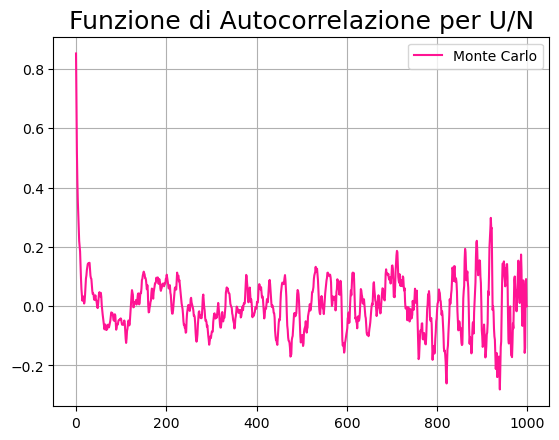

In [16]:
import numpy as np

M_ = 1000

# Calcola tutti i valori di PE
PE_values_MC = df_pe_MC['ACTUAL_PE:'].values[:M]

def ac(PE_values, t_max):
    PE_mean = np.mean(PE_values)
    ac_values = []
    
    # Calculate autocorrelation for each lag t
    for t in range(t_max):
        if t < t_max:  # Ensure we don't exceed array bounds
            numerator = np.mean(PE_values[:t_max-t] * PE_values[t:t_max]) - np.mean(PE_values[:t_max-t]) * np.mean(PE_values[t:t_max])
            denominator = np.mean(PE_values**2) - PE_mean**2
            
            ac_values.append(numerator / denominator)
    
    return np.array(ac_values)  # Return as numpy array for easier plotting

ac_values_MC = ac(PE_values_MC, M_)
t_values_MC = np.arange(len(ac_values_MC))

plt.plot(t_values_MC, ac_values_MC, color ='deeppink', label='Monte Carlo' )
plt.legend()
plt.grid(True)

plt.title('Funzione di Autocorrelazione per U/N', fontsize=18)

plt.show()

Dal grafic prodotto si osserva che le funzioni di autocorrelazione vanno a zero dopo dopo circa $200$ / $300$ blocchi. E'opportuno costruire dei blocchi più grandi di una decina di volte il tempo di autocorrelazione: quindi si può dire che il valore minimo da ssegnare ad $L$ sia circa $10^3$.


Si utilizzano poi gli stessi dati per dare una stima dell'incertezza statistica del valore di aspettazione di $U/N$ in funzione di differenti dimensioni di blocco (da $L=M/N=10$ a $L=10^3$). La dimensione ottimale del blocco si ha in corrispondenza del valore di $L$ per cui l'errore smette di crescere e si stabilizza.

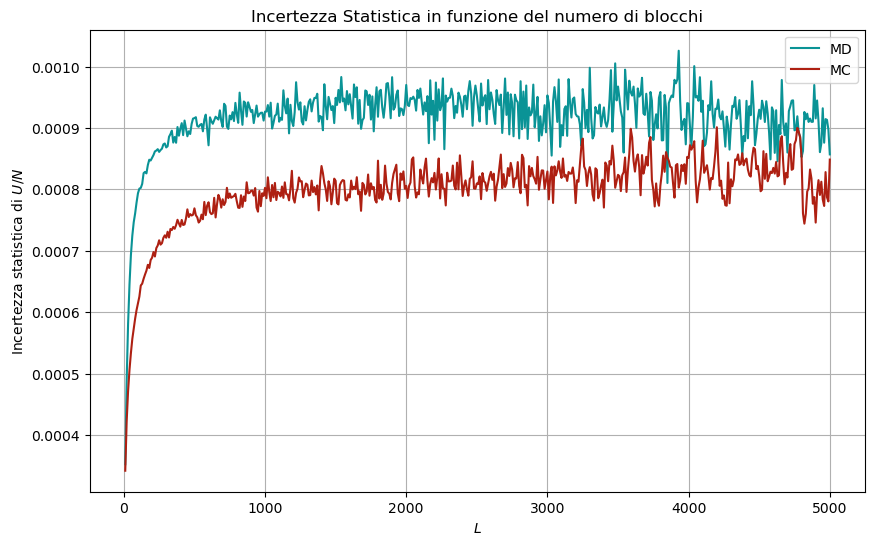

In [17]:
import numpy as np

#Parametri
L_max = 5000
L_min = 10
L_step = 10
block_sizes = np.arange(L_min, L_max + 1, L_step) 

def data_blocking(data, block_size):
    # Calculate number of blocks
    n_blocks = len(data) // block_size
    
    # Truncate data to fit complete blocks
    truncated_data = data[:n_blocks * block_size]
    
    # Reshape data into blocks and calculate mean of each block
    blocks = truncated_data.reshape(n_blocks, block_size)
    block_means = np.mean(blocks, axis=1)
    
    # Calculate statistical uncertainty (standard error of the mean)
    uncertainty = np.std(block_means) / np.sqrt(n_blocks)
    
    return uncertainty

# Calculate statistical uncertainties for different block sizes
PE_values_MD = df_pe_MD['ACTUAL_PE:'].values[:M]
PE_values_MC = df_pe_MC['ACTUAL_PE:'].values[:M]

uncertainties_MD = []
uncertainties_MC = []

for L in block_sizes:
    uncertainties_MD.append(data_blocking(PE_values_MD, L))
    uncertainties_MC.append(data_blocking(PE_values_MC, L))

plt.figure(figsize=(10, 6))
plt.plot(block_sizes, uncertainties_MD, color = '#0a9396', label = 'MD' )
plt.plot(block_sizes, uncertainties_MC, color = '#ae2012', label = 'MC' )
plt.xlabel(r'$L$')
plt.ylabel(r'Incertezza statistica di $U/N$')
plt.title('Incertezza Statistica in funzione del numero di blocchi')
plt.legend()
plt.grid(True)
plt.show()

Per valori di $L$ troopo piccoli si hanno incertezze troppo piccole e che non sono significative. Si nota che per $L < 2000$ le incertezze contonuano a crescere per poi arrivare ad un valore più o meno stabile. Dunque, ricordando anche il risultato ottenuto dall'autocorrelazione, si ricava che un buon valore da associare alla dimensione dei blocchi è $L=2000$.

### <span style="color:royalblue">Esercizio 07.3
Si include all'interno del codice 'NSL Simulator' il calcolo della funzione di disribuzione radiale, come funzione della distanza radiale tra le particelle. Se ne calcola il valore medio di ciascun blocco, il valore medio finale e l'incertezza.

### <span style="color:royalblue">Esercizio 07.4
Con l'utilizzo del codice implementato nell'esercizio precedente, si effettua una simulazione (completa di equilibrazione) di MC(NVT) e una di MD(NVE) secondo il modello di Lennard-Jones per l'Argon nelle condizioni di fase liquida.

Si mostrano i grafici dei valori medi e delle incertezze di:
- energia potenziale per particella $U/N$,
- pressione $P$,
- funzione di distribuzione radiale $g(r)$
nelle unità di misura di LJ.

Si comparano i risultati ottenuti con la simulazione di DM con quelli ottenuti tramite la simulazione MC.
Dopo avere analizzato i risultati dell'esercitazione 07.2 si è deciso di utilizzare $250$ blocchi da $2000$ passi ciascuno.

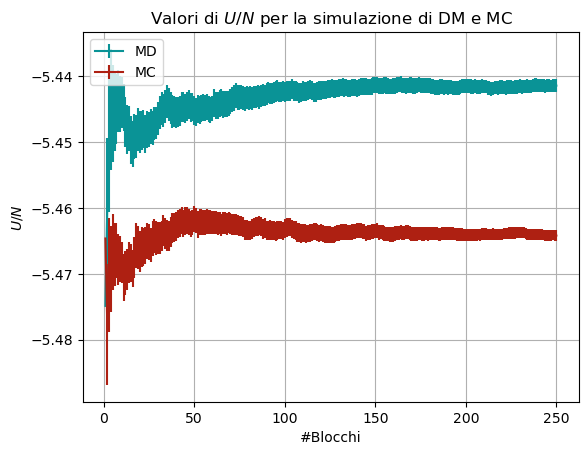

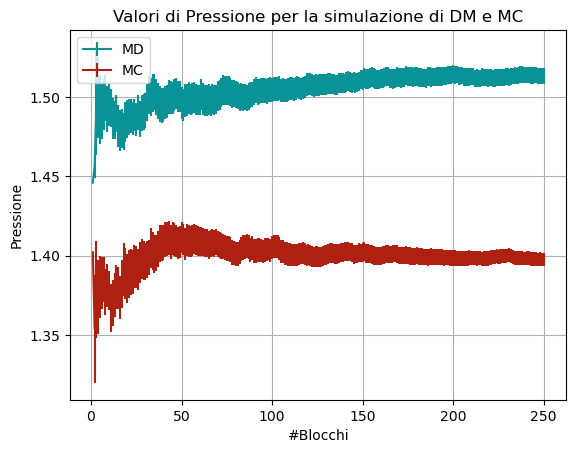

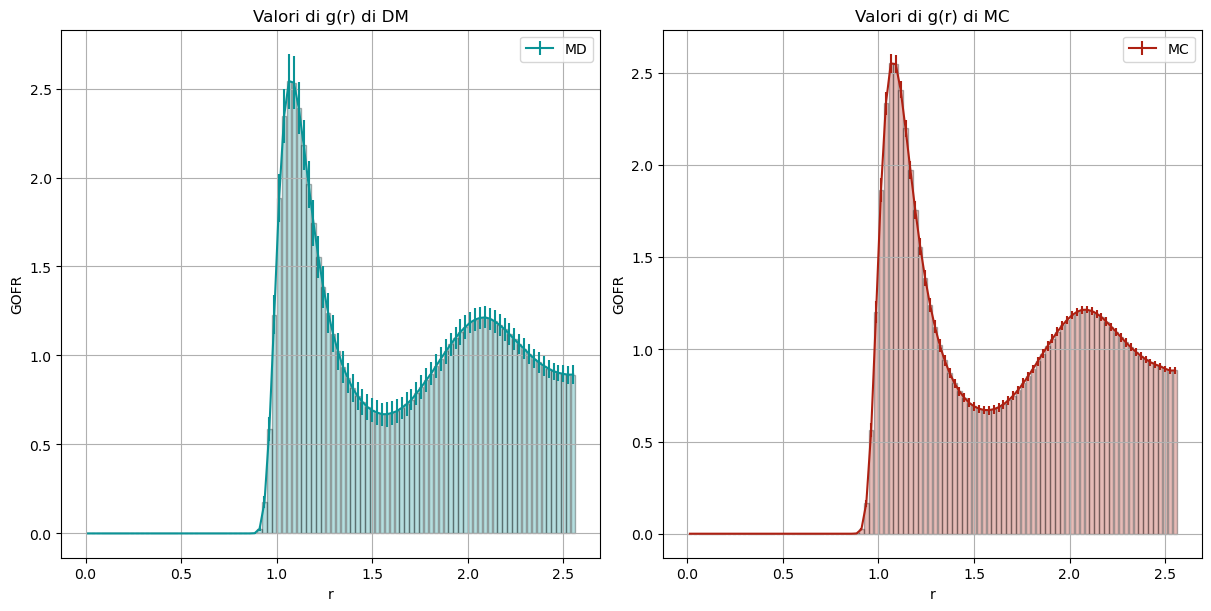

In [26]:
N = 250
L = 2000
M = N*L

dinp_MD_4 = "07.2/OUTPUT_FINALI_4/OUTPUT_MD/"
dinp_MC_4 = "07.2/OUTPUT_FINALI_4/OUTPUT_MC/"

#Energia Potenziale
finp_pe_MD_4 = dinp_MD_4 + "potential_energy_MD.dat" #energia potenziale all'equilibrio per sim MD
finp_pe_MC_4 = dinp_MC_4 + "potential_energy_MC.dat" #energia potenziale all'equilibrio per sim MC
if not os.path.isfile(finp_pe_MD_4):
    sys.exit( "file does not exist: " + finp_pe_MD_4 )
if not os.path.isfile(finp_pe_MC):
    sys.exit( "file does not exist: " + finp_pe_MC_4 )

df_pe_MD_4 = pd.read_csv(finp_pe_MD_4, sep='\\s+', comment='#', names=['BLOCK:','ACTUAL_PE:','AVE_PE:','ERROR:'])
df_pe_MC_4 = pd.read_csv(finp_pe_MC_4, sep='\\s+', comment='#', names=['BLOCK:','ACTUAL_PE:','AVE_PE:','ERROR:'])

plt.errorbar(df_pe_MD_4['BLOCK:'], df_pe_MD_4['AVE_PE:'], yerr= df_pe_MD_4['ERROR:'], label = 'MD', color = '#0a9396')
plt.errorbar(df_pe_MC_4['BLOCK:'], df_pe_MC_4['AVE_PE:'], yerr= df_pe_MC_4['ERROR:'], label = 'MC', color = '#ae2012')
plt.title(r'Valori di $U/N$ per la simulazione di DM e MC')
plt.xlabel('#Blocchi')
plt.ylabel(r'$U/N$')
plt.legend()
plt.grid(True)
plt.show()

#Pressione
finp_p_MD_4 = dinp_MD_4 + "pressure_MD.dat" #pressione all'equilibrio per sim MD
finp_p_MC_4 = dinp_MC_4 + "pressure_MC.dat" #pressione all'equilibrio per sim MC
if not os.path.isfile(finp_p_MD_4):
    sys.exit( "file does not exist: " + finp_p_MD_4 )
if not os.path.isfile(finp_p_MC_4):
    sys.exit( "file does not exist: " + finp_p_MC_4 )

df_p_MD_4 = pd.read_csv(finp_p_MD_4, sep='\\s+', comment='#', names=['BLOCK:','ACTUAL_P:','AVE_P:','ERROR:'])
df_p_MC_4 = pd.read_csv(finp_p_MC_4, sep='\\s+', comment='#', names=['BLOCK:','ACTUAL_P:','AVE_P:','ERROR:'])

plt.errorbar(df_p_MD_4['BLOCK:'], df_p_MD_4['AVE_P:'], yerr= df_p_MD_4['ERROR:'], label = 'MD', color = '#0a9396')
plt.errorbar(df_p_MC_4['BLOCK:'], df_p_MC_4['AVE_P:'], yerr= df_p_MC_4['ERROR:'], label = 'MC', color = '#ae2012')
plt.title('Valori di Pressione per la simulazione di DM e MC')
plt.xlabel('#Blocchi')
plt.ylabel('Pressione')
plt.legend()
plt.grid(True)
plt.show()

#GOFR
finp_g_MD_4 = dinp_MD_4 + "gofr_MD.dat" #gofr all'equilibrio per sim MD
finp_g_MC_4 = dinp_MC_4 + "gofr_MC.dat" #gofr all'equilibrio per sim MC
if not os.path.isfile(finp_g_MD_4):
    sys.exit( "file does not exist: " + finp_g_MD_4 )
if not os.path.isfile(finp_g_MC_4):
    sys.exit( "file does not exist: " + finp_g_MC_4 )

df_g_MD_4 = pd.read_csv(finp_g_MD_4, sep='\\s+', comment='#', names=['BLOCK:', 'DIST:', 'ACTUAL_G:','AVE_G:','ERROR:'])
df_g_MC_4 = pd.read_csv(finp_g_MC_4, sep='\\s+', comment='#', names=['BLOCK:', 'DIST:', 'ACTUAL_G:','AVE_G:','ERROR:'])
df_g_MD_filtro_4 = df_g_MD_4[df_g_MD_4['BLOCK:'] == N]
df_g_MC_filtro_4 = df_g_MC_4[df_g_MC_4['BLOCK:'] == N]

dist = df_g_MC_filtro_4['DIST:'].values
larghezza_bin = 0.9 * (dist[1] - dist[0])  # Adatto i bin per non farli sovrapporre

fig, spl = plt.subplots(1, 2, figsize=(12,6), layout = 'constrained') #due grafici affiancati per i parametri
spl[0].errorbar(df_g_MD_filtro_4['DIST:'], df_g_MD_filtro_4['AVE_G:'], yerr=50*df_g_MD_filtro_4['ERROR:'], label = 'MD', color = '#0a9396')
spl[0].bar(df_g_MD_filtro_4['DIST:'], df_g_MD_filtro_4['AVE_G:'], width=larghezza_bin, color = '#0a9396', edgecolor = 'black', alpha = 0.3)
spl[0].set_title('Valori di g(r) di DM')
spl[0].set_xlabel('r')
spl[0].set_ylabel('GOFR')
spl[0].legend()
spl[0].grid(True)

spl[1].errorbar(df_g_MC_filtro_4['DIST:'], df_g_MC_filtro_4['AVE_G:'], yerr=50*df_g_MC_filtro_4['ERROR:'], label = 'MC', color = '#ae2012')
spl[1].bar(df_g_MC_filtro_4['DIST:'], df_g_MC_filtro_4['AVE_G:'], width=larghezza_bin, color = '#ae2012', edgecolor = 'black', alpha = 0.3)
spl[1].set_title('Valori di g(r) di MC')
spl[1].set_xlabel('r')
spl[1].set_ylabel('GOFR')
spl[1].legend()
spl[1].grid(True)

#fig.suptitle('Parametri', fontsize=18)
plt.show()